In [1]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datasets = pd.read_csv('USA_accident_dataset.csv')
# X = datasets.iloc[:, [2,3]].values
# Y = datasets.iloc[:, 4].values

datasets = datasets.drop(columns=['Start_Time', 'End_Time', 'Timezone', 'Weather_Timestamp'])

In [3]:
datasets = datasets[datasets['Distance(mi)'] < 5]

#datasets['Distance(log)'] = np.log(datasets['Distance(mi)']) 


In [24]:
datasets.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
datasets.dropna(how="all", inplace=True)

In [15]:
# set X and y
y = datasets['Distance(mi)']
# X = datasets[['City','County','State','Wind_Speed(mph)','Junction','Time_Duration(min)']]
X = datasets.drop(['Distance(mi)','Severity'], axis=1)
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

y= y.reshape(-1, 1)

In [16]:
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [26]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
# define model
model = XGBRegressor()

In [28]:
# fit model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [13]:
# make a prediction
predict = model.predict(X_test)

In [15]:
# summarize prediction
print(predict)

[0.45996693 0.07913802 0.3448245  ... 0.5519614  0.63484186 2.8955562 ]


In [17]:
print(y_test)

[0.205 0.    0.068 ... 2.629 0.691 0.   ]


In [29]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [30]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [31]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.099 (0.001)


In [ ]:
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [55]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.050 (0.052)


In [32]:
score = model.score(X_train, y_train)  

print("Training score: ", score)


Training score:  0.24912786626020889


In [36]:
score = model.score(X_test, y_test)  

print("Test score: ", score)

Test score:  0.23851635728630172


In [33]:
ypred = model.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)


print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 0.02
RMSE: 0.15


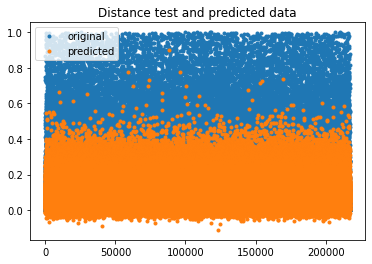

In [34]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test,'.', label="original")
plt.plot(x_ax, ypred, '.', label="predicted")

plt.title("Distance test and predicted data")

plt.legend()
plt.show()